In [1]:
CUDA_INDEX = 5
NAME = 'GED_IMDBMulti'
CLASSES = 1

In [2]:
import sys
sys.path.insert(0, '../..')
sys.path.insert(0, '../../pyged/lib')

In [3]:
import os
import pickle
import random
import time

import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.cuda.set_device(CUDA_INDEX)
torch.backends.cudnn.benchmark = True
import torch.optim
import torch_geometric as tg
import torch_geometric.data
from tqdm.auto import tqdm

from neuro import config, datasets, metrics, models, train, utils, viz
import pyged

from importlib import reload
reload(config)
reload(datasets)
reload(metrics)
reload(models)
reload(pyged)
reload(train)
reload(utils)
reload(viz)

<module 'neuro.viz' from '../../neuro/viz.py'>

In [4]:
train_set, train_meta = torch.load(f'../data/{NAME}/train.pt', map_location='cpu')

In [5]:
nodes = [h.num_nodes for h in train_set[1]]
edges = [h.num_edges for h in train_set[1]]
print(f'avg target nodes: {sum(nodes)/len(nodes):.3f}')
print(f'avg target edges: {sum(edges)/len(edges):.3f}')

avg target nodes: 12.869
avg target edges: 129.941


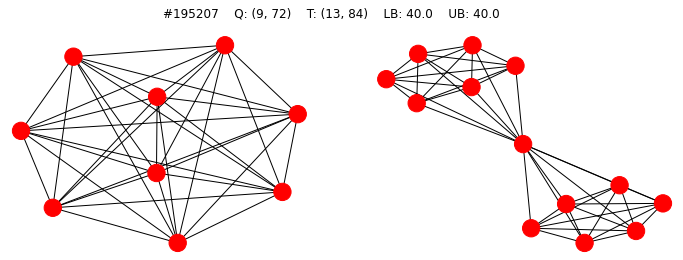

---

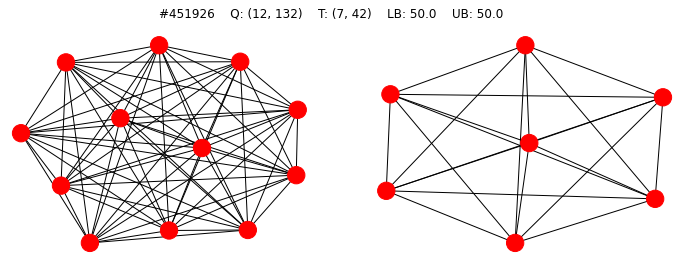

---

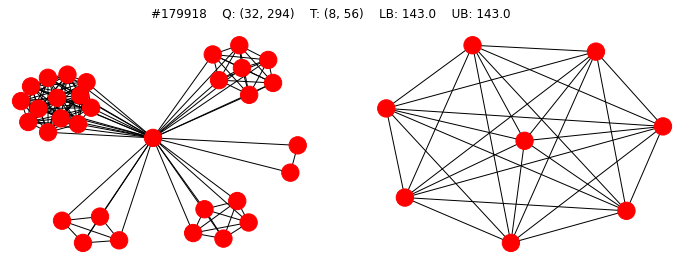

---

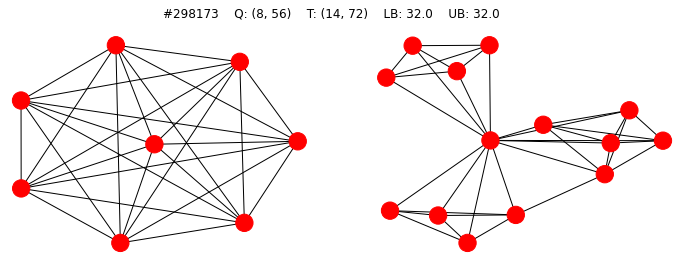

---

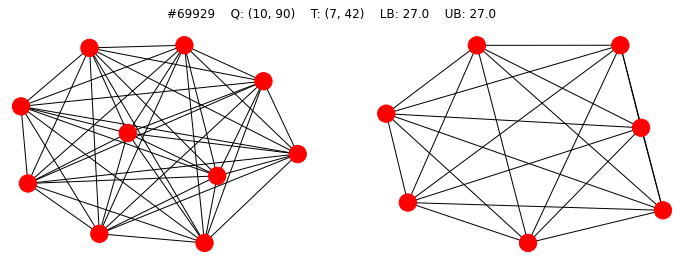

---

In [6]:
viz.plot_inner_dataset(train_set, n_items=5, random=True)

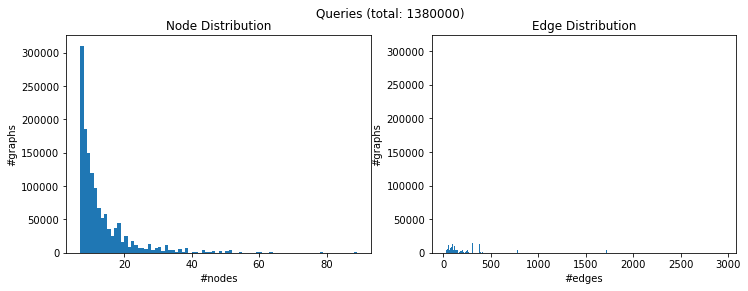

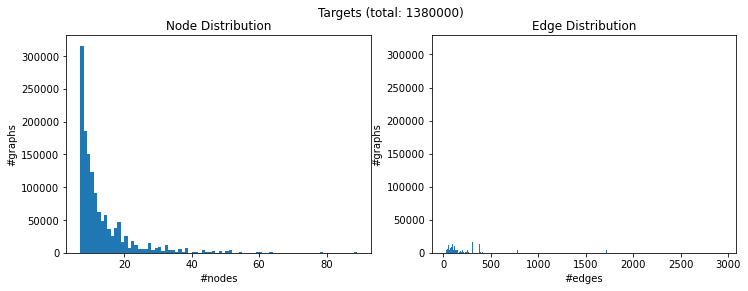

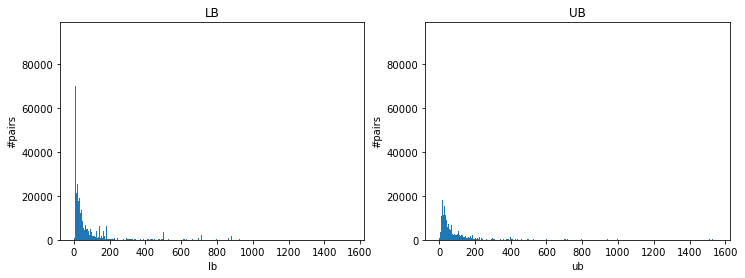

In [7]:
viz.plot_dataset_dist(train_set)

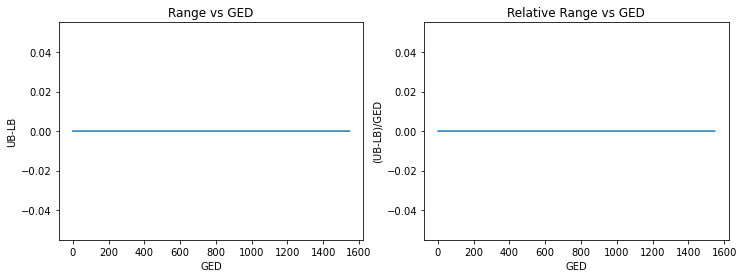

In [8]:
queries, targets, lb, ub = train_set
sed = (lb+ub)/2
plt.figure(figsize=(12,4))
plt.subplot(121)
viz.plot_corr(sed, ub-lb, show_std=True)
plt.xlabel('GED')
plt.ylabel('UB-LB')
plt.title('Range vs GED')
plt.subplot(122)
viz.plot_corr(sed, (ub-lb)/sed, show_std=True)
plt.xlabel('GED')
plt.ylabel('(UB-LB)/GED')
plt.title('Relative Range vs GED')
plt.show()

In [6]:
val_set, _ = torch.load(f'../data/{NAME}/val.pt', map_location='cpu')

In [7]:
model = models.NormGEDModel(8, CLASSES, 64, 64, pool='att').to(config.device)

In [8]:
loader = tg.data.DataLoader(list(zip(*train_set)), batch_size=200, shuffle=True)
val_loader = tg.data.DataLoader(list(zip(*val_set)), batch_size=1000, shuffle=True)

In [9]:
dump_path = os.path.join(f'../runlogs/{NAME}-PoolAtt', str(time.time()))
os.mkdir(dump_path)
train.train_full(model, loader, val_loader, lr=1e-3, weight_decay=1e-3, cycle_patience=5, step_size_up=2000, step_size_down=2000, dump_path=dump_path)

dump path: ../runlogs/GED_IMDBMulti-PoolAtt/1628338356.6891026


([20218.068359375,
  39952.05859375,
  14196.46484375,
  23359.90625,
  25525.205078125,
  24506.994140625,
  29567.763671875,
  21675.8828125,
  15570.63671875,
  23484.673828125,
  22643.98046875,
  35949.19921875,
  23913.603515625,
  32065.5,
  28863.7421875,
  18875.421875,
  50890.80859375,
  34196.42578125,
  34883.32421875,
  20875.771484375,
  18959.34375,
  28078.666015625,
  32970.82421875,
  36436.4296875,
  22949.259765625,
  19637.259765625,
  23888.669921875,
  29223.87109375,
  22839.119140625,
  29856.982421875,
  19225.26171875,
  19923.90625,
  22131.513671875,
  23469.876953125,
  15478.1435546875,
  18282.107421875,
  32925.7109375,
  21891.326171875,
  31791.603515625,
  32640.0390625,
  19830.41015625,
  33323.74609375,
  43678.3828125,
  16016.6796875,
  19483.37890625,
  33195.375,
  27359.919921875,
  30896.39453125,
  21162.44921875,
  20907.2578125,
  34130.578125,
  16025.796875,
  36545.875,
  25967.2265625,
  18234.9375,
  22613.9453125,
  31582.2890625,
